## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 9: ML
## Due 4 December, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebooks for lecture 9. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- Most of the lecture notes come from two sources. The first is the following book:
    > Goodfellow, [Deep Learning](http://www.deeplearningbook.org/). 

  and the other is the pytorch web page. In particular, the [tutorial page](https://pytorch.org/tutorials/) is great. 
 



### 1. XNOR 

Recall the two layer network with two inputs and two hidden nodes corresponds to the equations below, where $g$ is the Rectified Linear Unit function. By hand, find weights and biases so that this network computes the XNOR function (instead of XOR as shown in class. 

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
      w_{13} & w_{23} \\
      w_{14} & w_{24}
    \end{pmatrix}
      \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
    + \begin{pmatrix}b_3 \\ b_4\end{pmatrix} 
\right )
$$

and

$$
x_5 = 
g \left ( 
      \begin{pmatrix} w_{35} & w_{45} \end{pmatrix}
      \begin{pmatrix} x_3 \\ x_4 \end{pmatrix} 
    + b_5 
\right )
$$

with 

$y = x_5$ being the output.

### 2. PyTorch

Modify the PyTorch example below so that it learns to classify inputs with a 3x3 checkerboard instead of the 2x2 checkerboard shown in class. You may need to adjust the number of hidden neurons, the number of outer loop iterations, and the number of inner loop iterations. Then answer the following questions:

a) What is the effect of changing the learning rate to 0.01?

b) What is the effect of changing the learning rate to 0.001?

c) What is the effect of using only 2 nodes in the hidden layer? 

d) What is the effect of using only 2000 nodes in the hidden layer? 

Note that if this code does not work on your laptop, you probably need to install PyTorch. Alternatively, you could use Google CoLab.

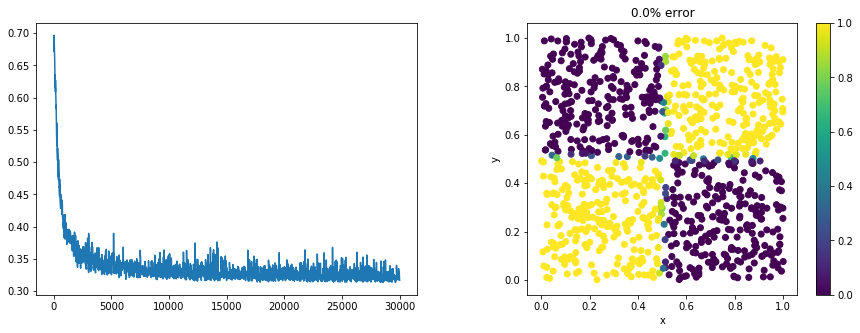

In [7]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

class ModelTwo(nn.Module):
    def __init__(self,size):
        super(ModelTwo, self).__init__()
        self.fc1 = nn.Linear(2,size)
        self.fc2 = nn.Linear(size,2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x),dim=1) 
        return x
    
def make_data(n):
    x = torch.rand(n,2)
    y = torch.tensor([
        (q[0]<0.5 and q[1]<0.5) or
        (q[0]>0.5 and q[1]>0.5)
        for q in x
    ],dtype=torch.long)     
    return x,y

def show_predictions(model, ax):
    x,y = make_data(1000)
    yhat = model(x)
    prediction = torch.argmax(yhat,dim=1) 
    err = 100 * torch.sum(torch.abs(y - prediction)) / 1000
    p = ax.scatter(x[:,0], x[:,1], c=yhat[:,1].detach(), vmin=0, vmax=1)
    ax.set_aspect(1)  
    ax.set_title("%0.1f%% error" % err)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(p)    

model = ModelTwo(100)    
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

data = []

fig,ax=plt.subplots(1,2,figsize=(15,5))

for _ in range(1000):
    x,y = make_data(100) 
    for _ in range(30):
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        data.append(loss)
        loss.backward() 
        optimizer.step()

ax[0].plot(data)
show_predictions(model, ax[1])    

### 3 Literature

Read the following three articles and then answer the questions below. Note that if you are not at UW you may need to use the [library proxy system](https://www.lib.washington.edu/help/connect) to get access to these papers.

- [Deep Learning](https://www-nature-com.offcampus.lib.washington.edu/articles/nature14539)
- [How To Deal With Machine Learning Papers](https://blogs.sciencemag.org/pipeline/archives/2019/11/20/how-to-deal-with-machine-learning-papers)

a) Why are local minima not a problem in large neural networks?
b) Why might scientists be skeptical of the use neural networks to understand scientific data?
c) Computational neural networks were not considered practical in the 1990s. What changed?
d) What safety and security issues are unique to the use of neural networks for engineering purposes?
e) What are three applications of machine learning you had not heard of that sound interesting to you?
f) What are the limitations of deep learning?